# Pre-Processing Data

**IDEA** : occupancy ~ price + location + cleaning_fee + error

Can I create a model that can predict the price booking depending on the locations?

What features do I need for the prediction model to predict the booking prices?
Features needed:

1) Zipcode

2) Property type

3) Booking price

4) Cleaning fee

5) Availability 30

6) Accommodates

7) Amount of bedrooms 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

import mpl_toolkits

In [2]:
df = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/apartment&house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3441 non-null   int64  
 1   Unnamed: 0.1               3441 non-null   int64  
 2   id                         3441 non-null   int64  
 3   latitude                   3441 non-null   float64
 4   longitude                  3441 non-null   float64
 5   zipcode                    3441 non-null   int64  
 6   property_type              3441 non-null   object 
 7   room_type                  3441 non-null   object 
 8   price                      3441 non-null   float64
 9   accommodates               3441 non-null   int64  
 10  cleaning_fee               3441 non-null   float64
 11  availability_30            3441 non-null   int64  
 12  bathrooms                  3441 non-null   float64
 13  bedrooms                   3441 non-null   float

<Figure size 720x720 with 0 Axes>

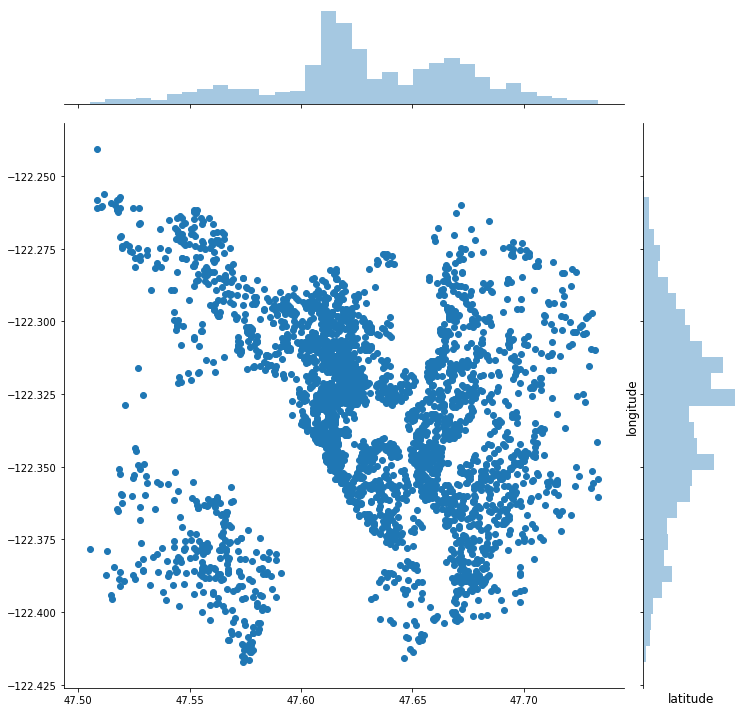

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [3]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, height=10)
plt.ylabel('longitude', fontsize=12)
plt.xlabel('latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Location of the area')

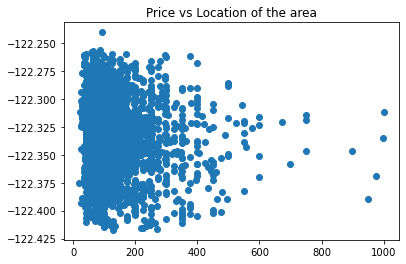

In [4]:
plt.scatter(df.price,df.longitude)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Price vs Latitude')

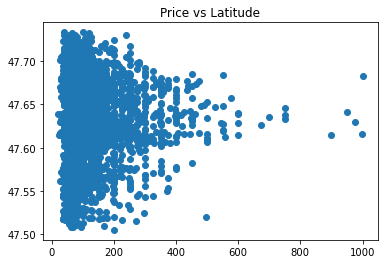

In [5]:
plt.scatter(df.price,df.latitude)
plt.title("Price vs Latitude")

# House Features

In [6]:
house = df[df['property_type'] == 'House']
hm2 = px.imshow(house.corr())
hm2.show()

In [7]:
house.shape

(1733, 18)

Text(0.5, 32.99999999999995, 'Amount of bedrooms')

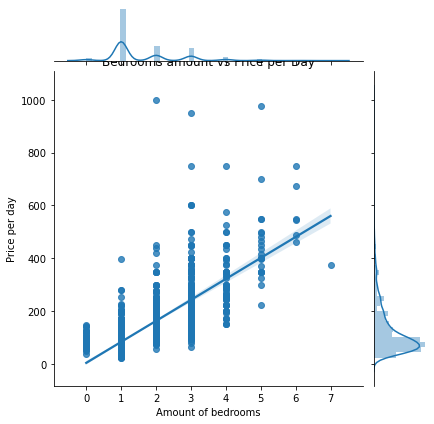

In [8]:
sns.jointplot(x="bedrooms", y="price", data=house, kind="reg")
plt.title('Bedrooms amount vs Price per Day')
plt.ylabel('Price per day')
plt.xlabel('Amount of bedrooms')

Text(0.5, 32.99999999999995, 'Accommodations')

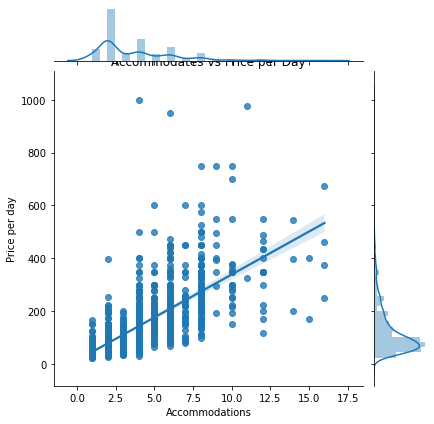

In [9]:
sns.jointplot(x='accommodates', y="price", data=house, kind="reg")
plt.title('Accommodates vs Price per Day')
plt.ylabel('Price per day')
plt.xlabel('Accommodations')

Text(0.5, 32.99999999999995, 'Cleaning Fee')

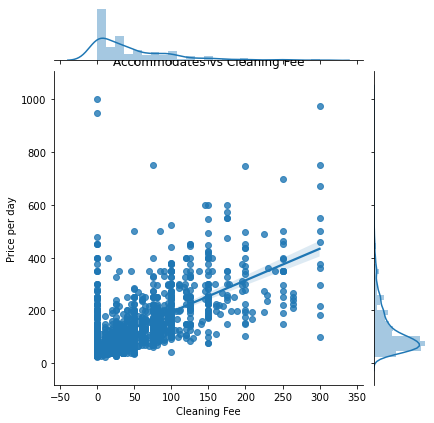

In [10]:
sns.jointplot(x="cleaning_fee", y="price", data=house, kind="reg")
plt.title('Accommodates vs Cleaning Fee')
plt.ylabel('Price per day')
plt.xlabel('Cleaning Fee')

Text(0.5, 32.99999999999995, 'Bathrooms amount')

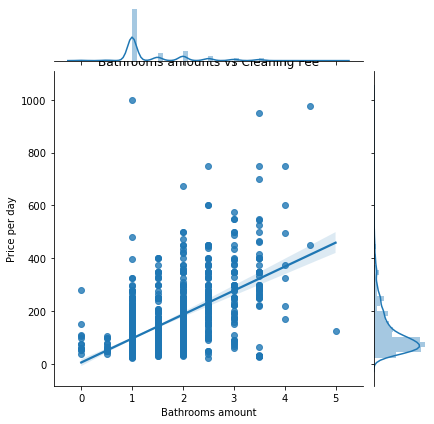

In [11]:
sns.jointplot(x="bathrooms", y="price", data=house, kind="reg")
plt.title('Bathrooms amounts vs Cleaning Fee')
plt.ylabel('Price per day')
plt.xlabel('Bathrooms amount')

# Feature Selection & Data Split

Define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable). After defining the variables, we will use them to split the data into a train set and test set.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3441 non-null   int64  
 1   Unnamed: 0.1               3441 non-null   int64  
 2   id                         3441 non-null   int64  
 3   latitude                   3441 non-null   float64
 4   longitude                  3441 non-null   float64
 5   zipcode                    3441 non-null   int64  
 6   property_type              3441 non-null   object 
 7   room_type                  3441 non-null   object 
 8   price                      3441 non-null   float64
 9   accommodates               3441 non-null   int64  
 10  cleaning_fee               3441 non-null   float64
 11  availability_30            3441 non-null   int64  
 12  bathrooms                  3441 non-null   float64
 13  bedrooms                   3441 non-null   float

In [13]:
features = pd.get_dummies(data=df, columns= ['property_type'])
features = features.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1', 'id', 'latitude', 'longitude'])

features.head()

,zipcode,room_type,price,accommodates,cleaning_fee,availability_30,bathrooms,bedrooms,review_scores_rating,review_scores_cleanliness,distance,cleaning_fee_class,property_type_Apartment,property_type_House
0,98119,Entire home/apt,85.0,4,0.0,14,1.0,1.0,95.0,10.0,0.000000,0,1,0
1,98119,Entire home/apt,150.0,4,40.0,13,1.0,1.0,96.0,10.0,4.807703,1,1,0
2,98119,Entire home/apt,975.0,11,300.0,1,4.5,5.0,97.0,10.0,4.359157,1,0,1
3,98119,Entire home/apt,100.0,3,0.0,0,1.0,0.0,0.0,0.0,4.495038,0,1,0
4,98119,Entire home/apt,450.0,6,125.0,30,2.0,3.0,92.0,9.0,4.691575,1,0,1


In [14]:

from sklearn.model_selection import train_test_split

X_var = features[['distance', 'accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms', 'cleaning_fee_class', 'property_type_Apartment', 'property_type_House']].values
y_var = features['price'].values


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2752, 8) (689, 8) (2752,) (689,)


We selected 'accommodates', 'cleaning_fee', 'bedrooms' and 'bathrooms' features to predict the booking price and split the data by train and test set. Let's proceed to build the model. 

# Building the model

I will build and train different linear regression models:
- The OLS model
- Ridge regression model
- Lasso regression model
- Bayesian regression model
- Elastic Net regression model

In [16]:
from sklearn.linear_model import LinearRegression

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_pred = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_pred = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_pred = en.predict(X_test)

In [17]:
print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.5444564329851744
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.5444750162206571
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.5444886987781992
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.5449383562002483
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.5449526058942558
-------------------------------------------------------------------------------


The ideal score should be between 0.60 and 1.0, and all variance score is 0.60, meaning the model can be used to solve the problem.

In [18]:
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_pred)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.5406768342886633
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.5406941959224019
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.5407058929414377
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.5411257341396927
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.5411383414868518
-------------------------------------------------------------------------------


The R-squared measures how well the dependent variable explains the variance of the independent variable. In this case, the R-squared is 0.60 meaning the model is capable to solve the problem. 

# Gradient boosting regression

Let's try the gradient boosting regression to improve the score.


In [19]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 300, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.2, loss = 'ls')

In [20]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=300)

In [21]:
clf.score(X_test,y_test)

0.3890207441586152

Using the Gradient boosting regression, the score improves to 63%. 